In [21]:
from google.colab import files
uploadfile = files.upload()

Saving bank_note_data.csv to bank_note_data.csv


In [0]:
import pandas as pd
import seaborn as s
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
import io

In [0]:
data = pd.read_csv(io.StringIO(uploadfile['bank_note_data.csv'].decode('utf-8')))

In [27]:
data.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


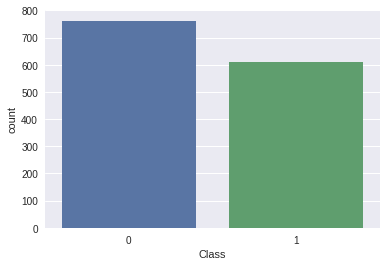

In [28]:
%matplotlib inline
s.countplot(x = 'Class', data = data)

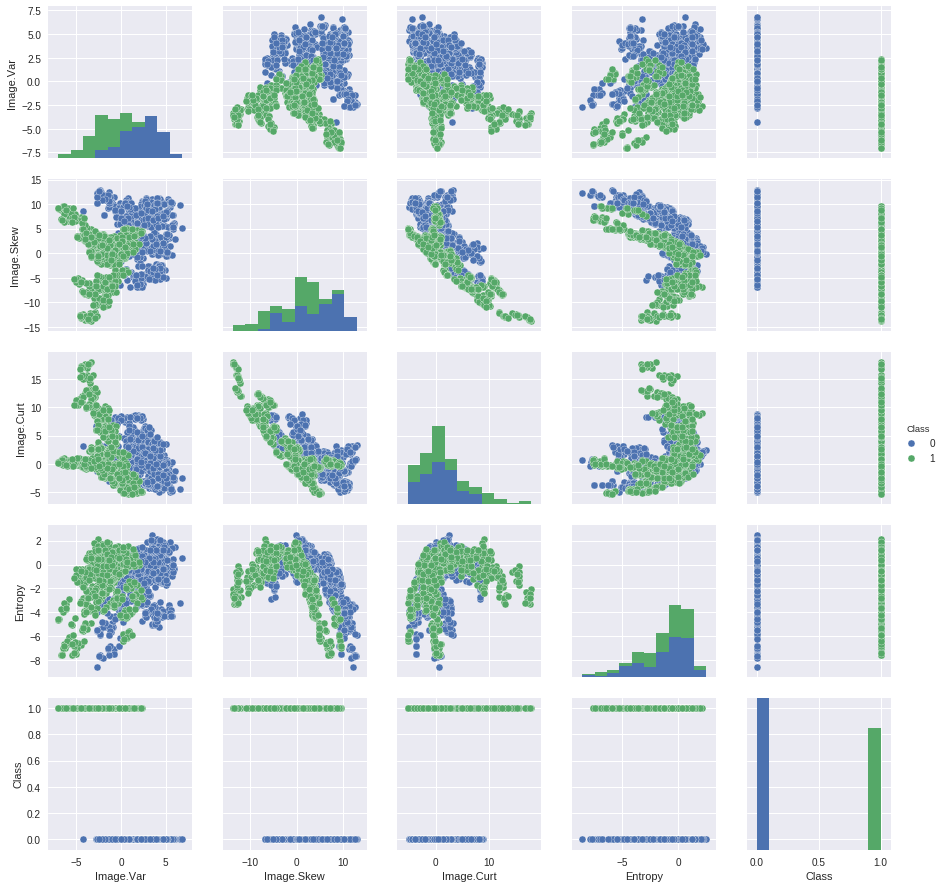

In [29]:
s.pairplot(data, hue = 'Class', kind = 'scatter')

In [32]:
scaler = StandardScaler()
scaler.fit(data.drop('Class', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [33]:
scaled_features = scaler.fit_transform(data.drop('Class', axis = 1))
#Converting Scaled Features to a DataFrame
df_feat = pd.DataFrame(scaled_features, columns = data.columns[:-1])
df_feat.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


In [0]:
### TEST TRAIN SPLIT
x = df_feat
y = data['Class']
# Using the .as_matrix() methodin order for TensorFlow to accept the data in Numpy array form instead of a pandas series.
x = x.as_matrix()
y = y.as_matrix()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [35]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:
print("confusion matrix")
rfc_preds = rfc.predict(x_test)
# Create confusion matrix
pd.crosstab(y_test, rfc_preds, rownames = ['Actual'], colnames = ['Predicted'])

confusion matrix


Predicted,0,1
Actual,,
0,238,2
1,1,171


In [38]:
print("Model evaluation\n" + classification_report(y_test,rfc_preds))

Model evaluation
             precision    recall  f1-score   support

          0       1.00      0.99      0.99       240
          1       0.99      0.99      0.99       172

avg / total       0.99      0.99      0.99       412

